# Homework 1

In [79]:
# imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import sqlite3
from collections import Counter
from pathlib import Path
from datetime import datetime, timedelta

### 1.0

Create a Series with the temperature values for the last 14 days in Boston. Use the pandas 'date_range' function to create the index.

In [80]:
# temperature values
temperature_values = [30, 50, 45, 39, 43, 37, 27, 28, 23, 19, 27, 18, 16, 21]

# Create a date range for the last 14 days ending on January 22, 2024
dates = pd.date_range(end=pd.to_datetime('2024-01-22'), periods=14)

# Create a Series with the temperature values using the date range as index
temperature_series = pd.Series(temperature_values, index=dates, name='Temperature_Boston')

print(temperature_series)

2024-01-09    30
2024-01-10    50
2024-01-11    45
2024-01-12    39
2024-01-13    43
2024-01-14    37
2024-01-15    27
2024-01-16    28
2024-01-17    23
2024-01-18    19
2024-01-19    27
2024-01-20    18
2024-01-21    16
2024-01-22    21
Freq: D, Name: Temperature_Boston, dtype: int64


### 1.1

Filter out the values below the mean (of the Series created in 1.0)

In [81]:
# Calculate the mean temperature
mean_temperature = temperature_series.mean()

# Filter out the values below the mean
filtered_series = temperature_series[temperature_series > mean_temperature]

filtered_series

2024-01-10    50
2024-01-11    45
2024-01-12    39
2024-01-13    43
2024-01-14    37
Freq: D, Name: Temperature_Boston, dtype: int64

### 1.2

Create a Series with the temperature values for every other day within the last 20 days in San Francisco.

In [82]:
# temperature values for every other day within the last 20 days
temperature_values_sf = [61, 55, 46, 50, 48, 57, 52, 52, 57, 57]

# Create a date range for the last 20 days, taking every other day
dates_sf = pd.date_range(end=pd.to_datetime('2024-01-22').normalize(), periods=10, freq='2D')

# Create a Series with the temperature values using the date range as index
temperature_series_sf = pd.Series(temperature_values_sf, index=dates_sf, name='Temperature_SF')

print(temperature_series_sf)

2024-01-04    61
2024-01-06    55
2024-01-08    46
2024-01-10    50
2024-01-12    48
2024-01-14    57
2024-01-16    52
2024-01-18    52
2024-01-20    57
2024-01-22    57
Freq: 2D, Name: Temperature_SF, dtype: int64


### 1.3

Calculate the temperature difference between Boston (1.0) and San Francisco (1.2) per day. Programatically find the day with the highest difference. Fill in the blanks:

In [83]:
# Find common dates between the two series
common_dates = temperature_series.index.intersection(temperature_series_sf.index)

# Select temperatures on common dates for both Boston and San Francisco
common_boston_temps = temperature_series.loc[common_dates]
common_sf_temps = temperature_series_sf.loc[common_dates]

# Calculate the temperature difference for common dates
temperature_difference_common_dates = common_boston_temps - common_sf_temps

# Find the day with the highest temperature difference
day_with_highest_difference_simple = temperature_difference_common_dates.abs().idxmax()
highest_difference_value_simple = temperature_difference_common_dates.abs().max()

day_with_highest_difference_simple, highest_difference_value_simple

print(f"The day with the highest difference in temperature is: {day_with_highest_difference_simple.strftime('%Y-%m-%d')} and the difference is: {highest_difference_value_simple} degrees Fahrenheit")

The day with the highest difference in temperature is: 2024-01-20 and the difference is: 39 degrees Fahrenheit


### 1.4

Find the maximum and minimum temperatures for Boston and San Francisco. Fill in the blanks:

In [84]:
# Find the maximum and minimum temperatures for Boston
max_temperature_boston = temperature_series.max()
min_temperature_boston = temperature_series.min()

# Find the maximum and minimum temperatures for San Francisco
max_temperature_sf = temperature_series_sf.max()
min_temperature_sf = temperature_series_sf.min()

# Format the output to include descriptive text
print(f"Boston Max Temperature is: {max_temperature_boston} degrees")
print(f"Boston Min Temperature is: {min_temperature_boston} degrees")
print(f"San Francisco Max Temperature is: {max_temperature_sf} degrees")
print(f"San Francisco Min Temperature is: {min_temperature_sf} degrees")

Boston Max Temperature is: 50 degrees
Boston Min Temperature is: 16 degrees
San Francisco Max Temperature is: 61 degrees
San Francisco Min Temperature is: 46 degrees


### 1.5

Plot the temperatures in Boston and San Francisco in one chart.

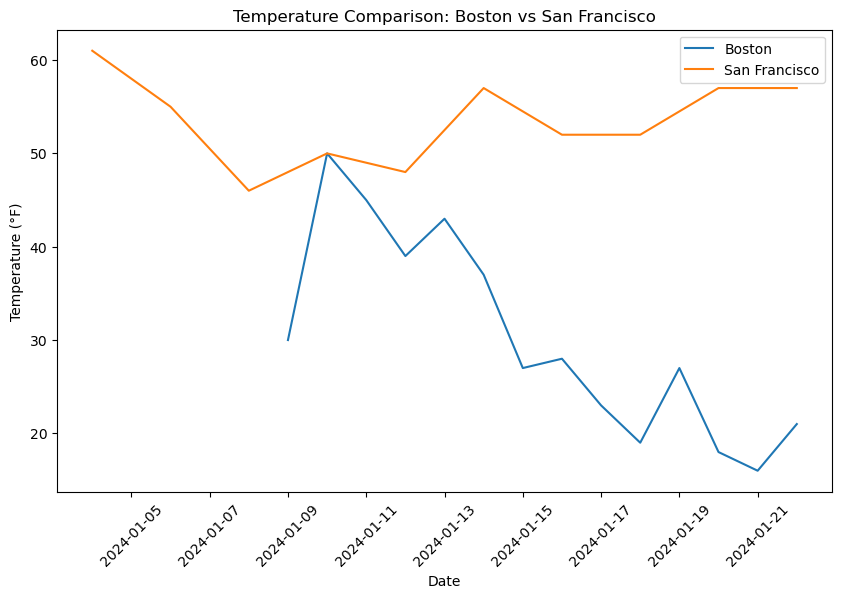

In [85]:
# Correcting variable names according to the provided series names
boston_temperatures = temperature_series
san_francisco_temperatures = temperature_series_sf

# Plotting the temperatures in Boston and San Francisco in one chart
plt.figure(figsize=(10, 6))

# Plot Boston temperatures
plt.plot(boston_temperatures.index, boston_temperatures, label='Boston')

# Plot San Francisco temperatures (without any scaling as not mentioned in the context)
plt.plot(san_francisco_temperatures.index, san_francisco_temperatures, label='San Francisco')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Temperature Comparison: Boston vs San Francisco')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.show()

### 2.1

Create a Dataframe with the names of your team members, their age, their favorite food, their favorite room temperature

In [86]:
# Team members' information with temperatures in Fahrenheit
team_info_f = {
    "Name": ["Nadeen", "Lucero", "Yutaro", "Marisol", "Ishan", "Milhelmina"],
    "Age": [26, 32, 23, 28, 25, 30],
    "Favorite Food": ["hot dog", "pollo a la brasa", "udon", "sushi", "pizza", "jollof rice"],
    "Favorite Room Temperature (°F)": [70, 77, 73.4, 72, 75, 82.4]
}

# Create DataFrame from the updated information
team_df_f = pd.DataFrame(team_info_f)
team_df_f

,Name,Age,Favorite Food,Favorite Room Temperature (°F)
0,Nadeen,26,hot dog,70.0
1,Lucero,32,pollo a la brasa,77.0
2,Yutaro,23,udon,73.4
3,Marisol,28,sushi,72.0
4,Ishan,25,pizza,75.0
5,Milhelmina,30,jollof rice,82.4


### 2.2

Filter the dataframe for only the two oldest team members

In [87]:
# Filtering the DataFrame for the two oldest team members
two_oldest = team_df_f.nlargest(2, 'Age')
two_oldest

,Name,Age,Favorite Food,Favorite Room Temperature (°F)
1,Lucero,32,pollo a la brasa,77.0
5,Milhelmina,30,jollof rice,82.4


### 2.3

Which team member is closest in favorite temperature to the 3rd percentil? Output his or her data.

In [88]:
# Calculate the 3rd percentile of the favorite room temperatures
third_percentile_temp = team_df_f['Favorite Room Temperature (°F)'].quantile(0.03)

# Find the team member whose favorite temperature is closest to the 3rd percentile
closest_to_third_percentile = team_df_f.iloc[(team_df_f['Favorite Room Temperature (°F)'] - third_percentile_temp).abs().argsort()[:1]]
closest_to_third_percentile

,Name,Age,Favorite Food,Favorite Room Temperature (°F)
0,Nadeen,26,hot dog,70.0


### 2.4

Get the 2nd and 3rd team members' favorite foods

In [89]:
# Get the favorite foods of the 2nd and 3rd team members
second_third_favorites = team_df_f.loc[[1, 2], "Favorite Food"]
second_third_favorites

1    pollo a la brasa
2                udon
Name: Favorite Food, dtype: object

### 2.5

Add 2 degrees to the favorite room temperature of the oldest two team members

In [90]:
# Identifying the indices of the oldest two team members
indices_oldest_two = team_df.nlargest(2, 'Age').index

# Adding 2 degrees to the favorite room temperature of the oldest two team members
team_df.loc[indices_oldest_two, 'Favorite Room Temperature (°F)'] += 2

team_df.loc[indices_oldest_two]

,Name,Age,Favorite Food,Favorite Room Temperature (°F)
3,Fiorella,33,Pasta,79.4
1,Zeeshan,31,pizza,79.0


## 3.0

Load the coaster_db.csv dataset

In [91]:
cwd = Path.cwd()
cwd

datapath = cwd / Path('data')
datapath

path = datapath.joinpath(Path('coaster_db.csv'))
path

path = Path('data').joinpath(Path('coaster_db.csv'))
coaster_df = pd.read_csv(path, low_memory=False)

In [92]:
coaster_df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


## 3.1
Store the coaster dataset in a new database. Ensure to handle duplicate column names.

In [93]:
# Manually rename columns with case sensitivity issues
coaster_df = coaster_df.rename(columns={'Flash Pass Available': 'Flash_Pass_Available_Case1',
                                        'Flash Pass available': 'Flash_Pass_Available_Case2'})

# Print all column names for inspection
print("Column names after manual renaming:", coaster_df.columns.tolist())

# Check and rename any remaining duplicate column names
column_counts = Counter(coaster_df.columns)
for col, count in column_counts.items():
    if count > 1:  # Column is duplicated
        for suffix in range(1, count + 1):
            new_name = f"{col}_{suffix}"
            coaster_df.columns = [new_name if column == col and not column_counts[new_name] else column for column in coaster_df.columns]
            column_counts[new_name] = 1

# Print modified column names for verification
print("Final column names:", coaster_df.columns.tolist())

# Inspect the DataFrame structure
print(coaster_df.head())

# Connect to SQLite database
conn = sqlite3.connect('./data/coaster_database.db')

# Attempt to store the dataframe in the database
try:
    coaster_df.to_sql('coasters', conn, if_exists='replace', index=False)
except Exception as e:
    print("Error during SQL operation:", e)
    conn.close()
    raise e

# Close the connection
conn.close()


Column names after manual renaming: ['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date', 'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height', 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section', 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle', 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced', 'Track layout', 'Fastrack available', 'Soft opening date.1', 'Closing date', 'Opened', 'Replaced by', 'Website', 'Flash_Pass_Available_Case1', 'Must transfer from wheelchair', 'Theme', 'Single rider line available', 'Restraint Style', 'Flash_Pass_Available_Case2', 'Acceleration', 'Restraints', 'Name', 'year_introduced', 'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit', 'speed_mph', 'height_value', 'height_unit', 'height_ft', 'Inversions_clean', 'Gforce_clean']
Final column names: ['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date', 'T

## 4.0

Clean the dataset coaster dataset.

- Ensure all columns only have one unit
- Ensure dates are as datetime
- Ensure boolean information is stored as boolean
- Only retain the following columns:
    - coaster_name
    - Length
    - Speed
    - Location
    - Status
    - Manufacturer
    - Height
    - Designer
    - Track layout
    - latitude
    - longitude
    - opening_date_clean
    - speed_mph
    - height_value
- Ensure the column names are descriptive, contain no blank spaces and have the same capitalization

In [94]:
# 1. Ensure all columns have one unit (this step depends on the specific columns and units)
# Example: Convert height from meters to feet if mixed (you'll need to adjust this based on your data)
# coaster_df['Height'] = coaster_df['Height'].apply(lambda x: x * 3.281 if <unit_condition> else x)

# 2. Convert date columns to datetime format
coaster_df['opening_date_clean'] = pd.to_datetime(coaster_df['opening_date_clean'], errors='coerce')

# 3. Ensure boolean information is stored as boolean (adjust as per your data's needs)
# Example: Convert a text field to boolean
# coaster_df['Status'] = coaster_df['Status'].apply(lambda x: True if x == <condition_for_true> else False)

# 4. Retain only specified columns
coaster_df = coaster_df[['coaster_name', 'Length', 'Speed', 'Location', 'Status',
                         'Manufacturer', 'Height', 'Designer', 'Track layout', 
                         'latitude', 'longitude', 'opening_date_clean', 'speed_mph', 'height_value']]

# 5. Rename columns to be descriptive, without blank spaces, and with consistent capitalization
coaster_df.columns = ['CoasterName', 'Length', 'Speed', 'Location', 'Status', 
                      'Manufacturer', 'Height', 'Designer', 'TrackLayout', 
                      'Latitude', 'Longitude', 'OpeningDate', 'SpeedMPH', 'HeightValue']

# Inspect the cleaned DataFrame
print(coaster_df.head())



                              CoasterName          Length             Speed  \
0                      Switchback Railway  600 ft (180 m)  6 mph (9.7 km/h)   
1                       Flip Flap Railway             NaN               NaN   
2  Switchback Railway (Euclid Beach Park)             NaN               NaN   
3            Loop the Loop (Coney Island)             NaN               NaN   
4            Loop the Loop (Young's Pier)             NaN               NaN   

                         Location   Status            Manufacturer  \
0                    Coney Island  Removed  LaMarcus Adna Thompson   
1                   Sea Lion Park  Removed            Lina Beecher   
2  Cleveland, Ohio, United States   Closed                     NaN   
3                           Other  Removed          Edwin Prescott   
4                           Other  Removed          Edwin Prescott   

         Height                Designer             TrackLayout  Latitude  \
0  50 ft (15 m)  LaMarcus A

In [95]:

# Convert 'Length' and 'Height' from string to a single unit (e.g., feet)
# This is a simplified example and might need adjustment for your data
def extract_numeric_value(column):
    return pd.to_numeric(coaster_df[column].str.extract(r'(\d+)')[0])

coaster_df['Length'] = extract_numeric_value('Length')
coaster_df['Height'] = extract_numeric_value('Height')

# Convert 'Speed' to a single unit (e.g., mph)
# You might need more complex logic depending on the data
coaster_df['Speed'] = coaster_df['Speed'].str.extract(r'(\d+)').astype(float)

# Convert 'OpeningDate' to datetime
coaster_df['OpeningDate'] = pd.to_datetime(coaster_df['OpeningDate'], errors='coerce')

# Handle NaN values (this is optional and depends on your specific needs)
# coaster_df = coaster_df.fillna(value={'SpeedMPH': 0, 'HeightValue': 0, ...})

# Additional cleaning as needed
# ...

# Inspect the cleaned DataFrame
print(coaster_df.head())


                              CoasterName  Length  Speed  \
0                      Switchback Railway   600.0    6.0   
1                       Flip Flap Railway     NaN    NaN   
2  Switchback Railway (Euclid Beach Park)     NaN    NaN   
3            Loop the Loop (Coney Island)     NaN    NaN   
4            Loop the Loop (Young's Pier)     NaN    NaN   

                         Location   Status            Manufacturer  Height  \
0                    Coney Island  Removed  LaMarcus Adna Thompson    50.0   
1                   Sea Lion Park  Removed            Lina Beecher     NaN   
2  Cleveland, Ohio, United States   Closed                     NaN     NaN   
3                           Other  Removed          Edwin Prescott     NaN   
4                           Other  Removed          Edwin Prescott     NaN   

                 Designer             TrackLayout  Latitude  Longitude  \
0  LaMarcus Adna Thompson  Gravity pulled coaster   40.5740   -73.9780   
1            Lina Beec

## 4.1

Add a column giving the average speed per height

In [96]:
# Calculate average speed per height (speed/height)
# Ensure to handle division by zero or NaN values
coaster_df['AvgSpeedPerHeight'] = coaster_df['Speed'].div(coaster_df['Height']).replace([np.inf, -np.inf], np.nan)

# Fill NaN values in the new column if necessary (e.g., with 0 or some other default value)
coaster_df['AvgSpeedPerHeight'].fillna(0, inplace=True)

# Inspect the updated DataFrame
coaster_df.head()


,CoasterName,Length,Speed,Location,Status,Manufacturer,Height,Designer,TrackLayout,Latitude,Longitude,OpeningDate,SpeedMPH,HeightValue,AvgSpeedPerHeight
0,Switchback Railway,600.0,6.0,Coney Island,Removed,LaMarcus Adna Thompson,50.0,LaMarcus Adna Thompson,Gravity pulled coaster,40.5740,-73.9780,1884-06-16,6.0,50.0,0.12
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,Lina Beecher,NaN,Lina Beecher,NaN,40.5780,-73.9790,1895-01-01,NaN,NaN,0.00
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,NaN,NaN,NaN,41.5800,-81.5700,NaT,NaN,NaN,0.00
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,Edwin Prescott,NaN,Edward A. Green,NaN,40.5745,-73.9780,1901-01-01,NaN,NaN,0.00
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,Edwin Prescott,NaN,Edward A. Green,NaN,39.3538,-74.4342,1901-01-01,NaN,NaN,0.00


## 4.2
Find the total number of empty values

In [97]:
# Calculate the total number of NaN values in the DataFrame
total_nan_values = coaster_df.isna().sum().sum()

print(f"Total number of NaN values in the DataFrame: {total_nan_values}")

Total number of NaN values in the DataFrame: 3011


## 4.3
Find the duplicated coasters and remove them

In [98]:
# Find duplicated rows based on 'CoasterName' and 'Location' (or any other relevant columns)
duplicates = coaster_df[coaster_df.duplicated(subset=['CoasterName', 'Location'])]

# Print duplicated rows for inspection
print("Duplicated rows:")
print(duplicates)

# Remove duplicated rows
# keep='first' keeps the first occurrence and removes subsequent duplicates
coaster_df = coaster_df.drop_duplicates(subset=['CoasterName', 'Location'], keep='first')

# Inspect the cleaned DataFrame
print("DataFrame after removing duplicates:")
coaster_df.head()


Duplicated rows:
                             CoasterName  Length  Speed  \
43                 Crystal Beach Cyclone     2.0   60.0   
60                           Derby Racer     NaN    NaN   
61           Blue Streak (Conneaut Lake)     2.0   50.0   
167        Big Thunder Mountain Railroad     NaN   35.0   
237    Thunder Run (Canada's Wonderland)   330.0   64.0   
...                                  ...     ...    ...   
1063                  Lil' Devil Coaster   262.0    NaN   
1064  Little Dipper (Conneaut Lake Park)     NaN    NaN   
1080                          Iron Gwazi     4.0   76.0   
1082             American Dreier Looping     3.0   53.0   
1084           Tron Lightcycle Power Run     3.0   59.0   

                       Location              Status  \
43           Crystal Beach Park             Removed   
60                 Revere Beach             Removed   
61           Conneaut Lake Park              Closed   
167                       Other                 NaN   

,CoasterName,Length,Speed,Location,Status,Manufacturer,Height,Designer,TrackLayout,Latitude,Longitude,OpeningDate,SpeedMPH,HeightValue,AvgSpeedPerHeight
0,Switchback Railway,600.0,6.0,Coney Island,Removed,LaMarcus Adna Thompson,50.0,LaMarcus Adna Thompson,Gravity pulled coaster,40.5740,-73.9780,1884-06-16,6.0,50.0,0.12
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,Lina Beecher,NaN,Lina Beecher,NaN,40.5780,-73.9790,1895-01-01,NaN,NaN,0.00
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,NaN,NaN,NaN,41.5800,-81.5700,NaT,NaN,NaN,0.00
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,Edwin Prescott,NaN,Edward A. Green,NaN,40.5745,-73.9780,1901-01-01,NaN,NaN,0.00
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,Edwin Prescott,NaN,Edward A. Green,NaN,39.3538,-74.4342,1901-01-01,NaN,NaN,0.00


## 4.4
What is the average coaster length per decade?

In [99]:
# Convert 'OpeningDate' to datetime
coaster_df['OpeningDate'] = pd.to_datetime(coaster_df['OpeningDate'], errors='coerce')

# Filter out rows where 'OpeningDate' is NaT (i.e., not a valid datetime)
coaster_df = coaster_df[coaster_df['OpeningDate'].notna()]

# Extract the decade from 'OpeningDate'
coaster_df['Decade'] = (coaster_df['OpeningDate'].dt.year // 10 * 10)

# Group by the decade and calculate the average length
average_length_per_decade = coaster_df.groupby('Decade')['Length'].mean()

print(average_length_per_decade)



Decade
1880    600.000000
1890           NaN
1900      1.000000
1910    484.000000
1920     32.760000
1930    253.166667
1940      2.666667
1950    146.000000
1960     75.727273
1970     49.490566
1980    167.106667
1990    116.032468
2000    152.469388
2010    171.269006
2020    100.000000
Name: Length, dtype: float64


## 4.5
Find the median speed per Designer

In [100]:
# Group by 'Designer' and calculate the median speed
median_speed_per_designer = coaster_df.groupby('Designer')['Speed'].median()

print(median_speed_per_designer)


Designer
Al CollinsJeff Gramke                               64.0
Alan Schilke                                        57.0
Alan SchilkeRenato Manzoni                          76.0
Alison Brittle, Eden Carpenter, and Gary Norton     50.0
Andy Vettel (1968)John A. Miller (1924)             55.0
                                                   ...  
Werner Stengel[3]                                  148.0
William Cobb                                        58.0
William Cobb & Associates                           59.0
William CobbWerner Stengel                          62.0
Zierer                                              22.0
Name: Speed, Length: 145, dtype: float64


## 4.6
What is the active coaster length per location? Sort high-to-low.

In [101]:
# Convert 'Length' to a numeric column if it's not already
coaster_df['Length'] = pd.to_numeric(coaster_df['Length'], errors='coerce')

# Filter for active coasters (assuming 'Operating' indicates active)
active_coasters = coaster_df[coaster_df['Status'] == 'Operating']

# Calculate the total length of active coasters per location
active_coaster_length_per_location = active_coasters.groupby('Location')['Length'].sum().sort_values(ascending=False)

print(active_coaster_length_per_location)


Location
Walibi Holland             5840.0
Canada's Wonderland        4468.0
Alton Towers               3516.0
Movie Park Germany         3076.0
Morey's Piers              2746.0
                            ...  
Walibi Rhône-Alpes            0.0
Attractiepark Slagharen       0.0
Castles N' Coasters           0.0
Brean Leisure Park            0.0
Memphis Kiddie Park           0.0
Name: Length, Length: 216, dtype: float64


## 4.7
Which manufaturer had the heighest active amount of coaster length each decade?

In [102]:
# Convert 'OpeningDate' to datetime and 'Length' to numeric
coaster_df['OpeningDate'] = pd.to_datetime(coaster_df['OpeningDate'], errors='coerce')
coaster_df['Length'] = pd.to_numeric(coaster_df['Length'], errors='coerce')

# Filter for active coasters
active_coasters = coaster_df[coaster_df['Status'] == 'Operating'].copy()  # Create a copy of the DataFrame

# Extract the decade
active_coasters['Decade'] = (active_coasters['OpeningDate'].dt.year // 10 * 10).fillna(0).astype(int)

# Group by decade and manufacturer, summing the length
decade_manufacturer_length = active_coasters.groupby(['Decade', 'Manufacturer'])['Length'].sum()

# Find the manufacturer with the highest length per decade
max_length_per_decade = decade_manufacturer_length.reset_index().groupby('Decade').apply(
    lambda x: x.nlargest(1, 'Length')).reset_index(drop=True)

# Sort by 'Length' in descending order
max_length_per_decade_sorted = max_length_per_decade.sort_values(by='Length', ascending=False)

print(max_length_per_decade_sorted[['Decade', 'Manufacturer', 'Length']])


    Decade                        Manufacturer  Length
10    2000                              Vekoma  8793.0
9     1990                              Vekoma  7115.0
11    2010                          Gerstlauer  5793.0
8     1980                              Vekoma  4006.0
3     1930      Philadelphia Toboggan Coasters  1509.0
1     1910                   LaMarcus Thompson   967.0
5     1950  Linnanmäki, led by Svend Jarlström   960.0
7     1970                   Anton Schwarzkopf   812.0
12    2020           S&S - Sansei Technologies   770.0
2     1920                        Charlie Mach     8.0
4     1940      Philadelphia Toboggan Coasters     7.0
6     1960      Philadelphia Toboggan Coasters     6.0
0     1900        Federal Construction Company     1.0


## 4.8
What is the favorite track layout and how does it change over time? Show in a plot. Which layout is most expensive?

<Figure size 1000x800 with 0 Axes>

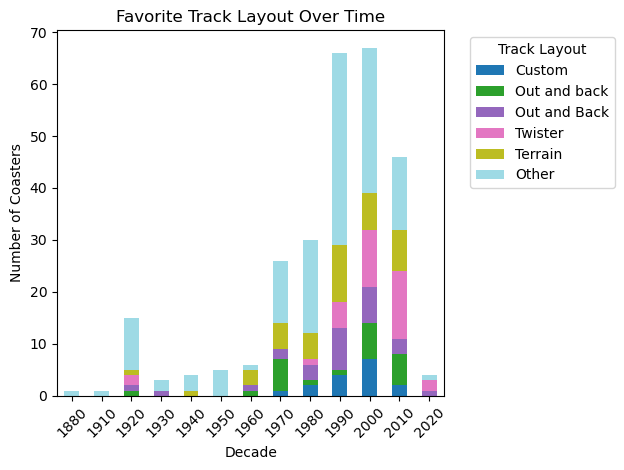

In [103]:
# Count each track layout per decade
layout_count_per_decade = coaster_df.groupby(['Decade', 'TrackLayout']).size().unstack(fill_value=0)

# Reduce the number of track layouts by grouping small counts into 'Other'
threshold = 10  # Example threshold
other = layout_count_per_decade.columns[layout_count_per_decade.sum() < threshold]
layout_count_per_decade['Other'] = layout_count_per_decade[other].sum(axis=1)
layout_count_per_decade.drop(columns=other, inplace=True)

# Sort by the number of occurrences to have a consistent color mapping
sorted_layouts = layout_count_per_decade.sum().sort_values().index
layout_count_per_decade = layout_count_per_decade[sorted_layouts]

# Plot the data
plt.figure(figsize=(10, 8))  # Increase figure size
layout_count_per_decade.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Favorite Track Layout Over Time')
plt.xlabel('Decade')
plt.ylabel('Number of Coasters')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.legend(title='Track Layout', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.tight_layout()  # Fit the plot neatly within the figure
plt.show()


## 5.0
Using the earthquake data: Which coaster was closest to an earthquake that happened in the last 90 days?

- load the earthquake data
- calculate the distances as:
    - distance = square root((Latitude1 - Latitude2) **2 + (Longitude1 - Longitude2) **2)
- Print the coaster information and how far away it was from the closes earthquake

In [104]:
# Load the earthquake data
datapath = Path.cwd().joinpath('data', 'earthquake.csv')
earthquake_df = pd.read_csv(datapath)

In [105]:
# Function to calculate distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

# Convert 'time' to datetime
earthquake_df['time'] = pd.to_datetime(earthquake_df['time'], unit='ms')

# Filter earthquakes from the last 90 days
current_date = datetime.now()
ninety_days_ago = current_date - timedelta(days=90)
recent_earthquakes = earthquake_df[earthquake_df['time'] >= ninety_days_ago]

# Initialize a column for the minimum distance
coaster_df['MinDistanceToEarthquake'] = np.inf

# Calculate the distance of each coaster to each earthquake
for _, earthquake in recent_earthquakes.iterrows():
    distances = coaster_df.apply(lambda coaster: haversine(coaster['Latitude'], coaster['Longitude'], earthquake['Latitude'], earthquake['Longitude']), axis=1)
    coaster_df['MinDistanceToEarthquake'] = np.minimum(coaster_df['MinDistanceToEarthquake'], distances)

# Find the coaster closest to any of these earthquakes
closest_coaster = coaster_df.loc[coaster_df['MinDistanceToEarthquake'].idxmin()]

print("Closest Coaster to an Earthquake in the Last 90 Days:")
print(closest_coaster)

Closest Coaster to an Earthquake in the Last 90 Days:
CoasterName                    Switchback Railway
Length                                      600.0
Speed                                         6.0
Location                             Coney Island
Status                                    Removed
Manufacturer               LaMarcus Adna Thompson
Height                                       50.0
Designer                   LaMarcus Adna Thompson
TrackLayout                Gravity pulled coaster
Latitude                                   40.574
Longitude                                 -73.978
OpeningDate                   1884-06-16 00:00:00
SpeedMPH                                      6.0
HeightValue                                  50.0
AvgSpeedPerHeight                            0.12
Decade                                       1880
MinDistanceToEarthquake                       inf
Name: 0, dtype: object
